# Example notebook for queueing simulation

#### Issues
* The arrivals follow a poisson distribution, but the interarrival times an exponential one?
* The numbers do not add up yet

### 1. Imports

In [1]:
from scipy import stats

import pandas as pd
import numpy as np

import queueing

import matplotlib.pyplot as plt

### 2. Prepare inputs

#### Specify the long term average IAT and ST in seconds

In [2]:
# arrivals and services
arrivals_per_hour = 8  # lambda
services_per_hour = 9  # mu

# inter arrival times and service times
aver_IAT_in_secs = 3600 / arrivals_per_hour
aver_ST_in_secs = 3600 / services_per_hour

print(aver_IAT_in_secs)
print(aver_ST_in_secs)

450.0
400.0


#### Define the queue object input

In [3]:
# the arrivals follow a poisson distribution
# A = queueing.arrival_process("M", stats.poisson(mu = aver_IAT_in_secs))
# the interarrival times an exponential one
A = queueing.arrival_process("M", stats.expon(scale = aver_IAT_in_secs))
S = queueing.service_process("M", stats.expon(scale = aver_ST_in_secs))
c = 1

#### Create the queue object and use it to create a simulating object

In [4]:
# todo: enable deterministic analyses by adding a list of 'customer_name#', 'interarrival#' and 'servicetime#'
q = queueing.queue(A, S, c)
sim = queueing.simulation(q)

### 3. Run the simulation

In [5]:
%%time
sim.run(1000000) # nr is the number of customers that will arrive at the server

Wall time: 1min 51s


### 4. Analyse and visualise results

#### Get statistics

In [6]:
print('--- input statistics --------')
print("aver_IAT_in_secs: {:.2f} [seconds]".format(aver_IAT_in_secs))
print("aver_ST_in_secs: {:.2f} [seconds]".format(aver_ST_in_secs))
print('')

print('--- simulation statistics ---')
sim.get_stats()

--- input statistics --------
aver_IAT_in_secs: 450.00 [seconds]
aver_ST_in_secs: 400.00 [seconds]

--- simulation statistics ---
Average IAT: 450.34 [seconds]
Average ST: 399.87 [seconds]

Total number of customers: 1000000.00
Average nr arrivals: 7.99 [# per hour]
Average nr services: 9.00 [# per hour]

Total waiting time: 3176419897.82 [seconds]
Average waiting time of all customers: 3176.42 [seconds]
Average waiting time of customers that waited: 3576.88 [seconds]

Probability of idle server (nobody in the system): 0.1121
Probability that somebody is waiting: 0.8880
Probability that nobody is waiting: 0.1120
Probability that 1 person is waiting: 0.0998
Probability that 2 persons are waiting: 0.0885
Probability that 3 persons are waiting: 0.0785
Probability that 9 persons are waiting (10 in system): 0.0384

Total service time: 399873705.52 [seconds]
Average total time a customer spent in the system: 3576.29 [seconds]
Average waiting time as a fraction of ST: 7.94

System utilisation

**Analytical solution: M_M_1_inf_inf_FIFO**

    arrival rate: 8.0000 per hour
    service rate: 9.0000 per hour
    rho: 0.8889

    P_0: probability that there are 0 customers in the system = 0.1111
    P_1: probability of 1 customers in the system = 0.0988
    P_10: probability of 10 customers in the system = 0.0342

    no_q: probability that there is nobody in the queue (P_0+P_1) = 0.2099
    util_sys: system utilisation rate  (P_(n>=1)) = 0.8889
    util_ser: server utilisation rate (P_(n>=2)) = 0.7901

    L_s: the long term average number of customers present in the system = 8.0000
    L_q: the long term average number of customers present in the queue = 7.1111
    W_s: the long term average waiting time in the system = 1.0000 hour (= 60.0 minutes)
    W_q: the long term average waiting time in the queue = 0.8889 hour (= 53.3 minutes)

#### Return log

In [7]:
sim.return_log(15)
# c = customer
# IAT = inter arrival time
# ST = service time
# AT = arrival time
# TSB = time service begins
# TSE = time service ends
# TCSS = time customer spends in the system
# TCWQ = time customer waits in the queue
# ITS = idle time of the server
# QL = queue length

,c,IAT,ST,AT,TSB,TSE,TCSS,TCWQ,ITS,QL
0,1,548.576930,65.707717,548.576931,548.576931,614.284648,65.707717,0.000000,548.576930,0
1,2,330.131970,1040.658379,878.708900,878.708900,1919.367280,1040.658379,0.000000,264.424253,2
2,3,658.000631,290.849416,1536.709532,1919.367280,2210.216696,673.507164,382.657748,0.000000,1
3,4,346.632586,54.231218,1883.342118,2210.216696,2264.447914,381.105796,326.874578,0.000000,0
4,5,496.015322,334.227368,2379.357440,2379.357440,2713.584808,334.227368,0.000000,114.909526,0
5,6,669.681711,1158.151168,3049.039152,3049.039152,4207.190320,1158.151168,0.000000,335.454344,0
6,7,1657.183047,95.073120,4706.222199,4706.222199,4801.295319,95.073120,0.000000,499.031879,0
7,8,137.228523,899.392949,4843.450722,4843.450722,5742.843671,899.392949,0.000000,42.155403,3
8,9,193.850395,54.034028,5037.301116,5742.843671,5796.877699,759.576582,705.542554,0.000000,2
9,10,404.344153,147.834586,5441.645269,5796.877699,5944.712285,503.067016,355.232430,0.000000,1


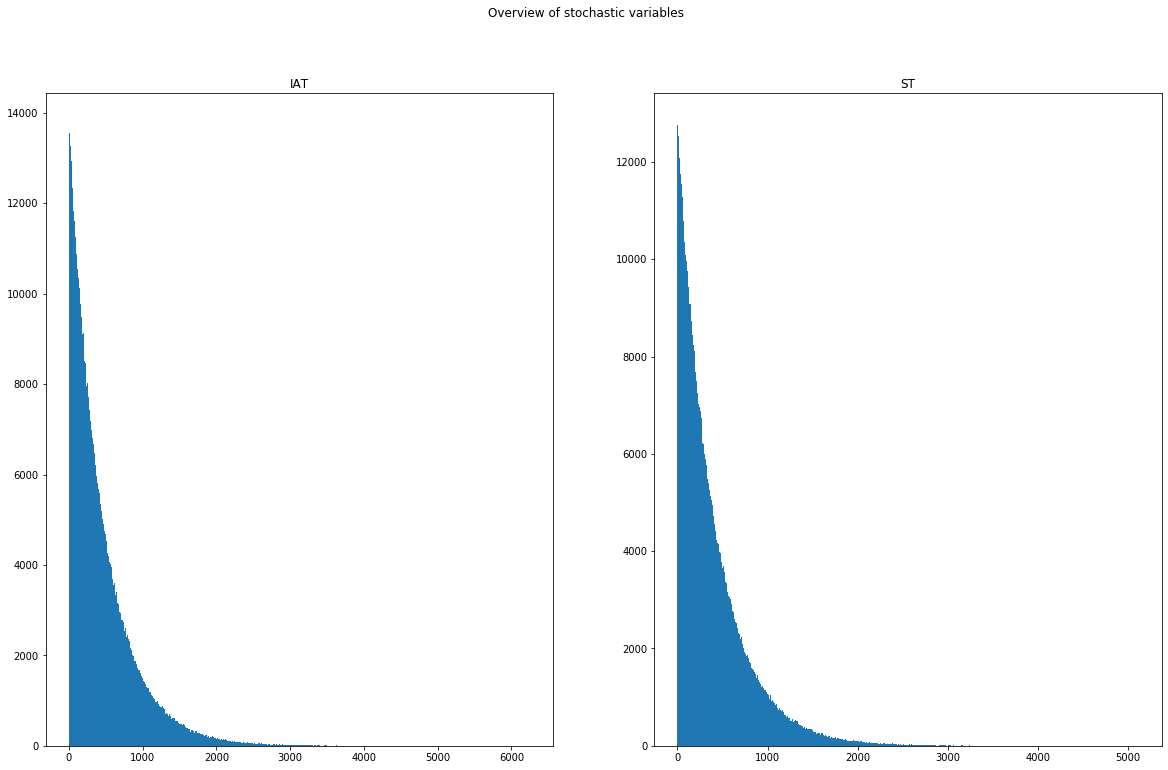

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))

fig.suptitle('Overview of stochastic variables')
ax1.hist(sim.log["IAT"],1000); ax1.set_title('IAT');
ax2.hist(sim.log["ST"],1000); ax2.set_title('ST');

## Old notebook code

In [9]:
c = 20

A = queueing.arrival_process("M", stats.poisson(1 / (c * 0.9)))
S = queueing.service_process("M", stats.expon(0))
q = queueing.queue(A, S, c)

print("Mean waiting time:", q.mean_waiting_time)
print("Delay probability:", q.delay_probability)

AttributeError: 'queue' object has no attribute 'mean_waiting_time'

In [ ]:
# https://www.win.tue.nl/~iadan/queueing.pdf Page 45, Table 5.1

import numpy as np

customers = [1, 2, 5, 10, 20]
delay_probability = [0.90, 0.85, 0.76, 0.67, 0.55]
mean_waiting_time = [9.00, 4.26, 1.53, 0.67, 0.28]

for i, c in enumerate(customers):

    # Arrival process varies dependent on number of customers
    A = queueing.arrival_process("M", stats.poisson(1 / (c * 0.9)))

    # Mean service time is 1 unit of time
    S = queueing.service_process("M", stats.expon(0))

    # Create queue
    q = queueing.queue(A, S, c)
    
    
    print(q.kendall_notation)
    print("Utilization:      ", .9, q.utilization)
    print("Delay probability:", delay_probability[i], q.delay_probability)
    print("Mean waiting time:", mean_waiting_time[i], q.mean_waiting_time)
    print("")
    


    # Check results
    assert np.isclose(0.9, q.utilization, rtol = 0.1, atol = 0.1)
    assert np.isclose(delay_probability[i], q.delay_probability, rtol = 0.1, atol = 0.1)
    assert np.isclose(mean_waiting_time[i], q.mean_waiting_time, rtol = 0.1, atol = 0.1)

In [ ]:
# https://www.win.tue.nl/~iadan/queueing.pdf Page 45, Table 5.2

import numpy as np

customers = [1, 2, 5, 10, 20]
utilization = [0.90, 0.95, 0.98, 0.99, 0.995]
mean_waiting_time = [9.00, 9.26, 9.50, 9.64, 9.74]
mean_queue_length = [9, 19, 51, 105, 214]

for i, c in enumerate(customers):

    # Arrival process varies dependent on number of customers
    A = queueing.arrival_process("M", stats.poisson(1 / (c * utilization[i])))

    # Mean service time is 1 unit of time
    S = queueing.service_process("M", stats.expon(0))

    # Create queue
    q = queueing.queue(A, S, c)

    # Check results
    print(q.kendall_notation)
    print("Utilization:      ", utilization[i], q.utilization)
    print("Mean queue length:", mean_queue_length[i], q.mean_queue_length)
    print("Mean waiting time:", mean_waiting_time[i], q.mean_waiting_time)
    print("")
    
    
#     assert np.isclose(0.9, q.utilization, rtol = 0.1, atol = 0.1)
#     assert np.isclose(mean_queue_length[i], q.mean_queue_length, rtol = 0.1, atol = 0.1)
#     assert np.isclose(mean_waiting_time[i], q.mean_waiting_time, rtol = 0.2, atol = 0.2)

In [ ]:
# c = customer
# IAT = inter arrival time
# AT = now + IAT
# ST = service time
# TSB = time service begins
# TCWQ = time customer waits in the queue
# TSE = time service ends
# TCSS = time customer spends in the system
# ITS = idle time of the server


# customer, IAT, AT, ST, TSB, TCWQ, TSE, TCSS, ITS

In [ ]:
c = 2
A = queueing.arrival_process("M", stats.poisson(1 / (c * 0.95)))
S = queueing.service_process("M", stats.expon(0))

q = queueing.queue(A, S, c)
sim = queueing.simulation(q)

In [ ]:
%%time
sim.simulate(50)

In [ ]:
sim.log

In [ ]:
print("Simulation results:")
sim.get_stats()

print("\n------------------------------------------\n")

print("Analytical solution:")
print("The arrival rate is:      {:04.2f} seconds".format(sim.environment.queue.A.arrival_rate))
print("The mean waiting time is: {:04.2f} seconds".format(sim.environment.queue.mean_waiting_time))
print("The mean service time is: {:04.2f} seconds".format(sim.environment.queue.S.mean_service_time))

In [ ]:
import pandas as pd

In [ ]:
df=pd.DataFrame(data = sim.log)
df

In [ ]:
stats.poisson(1 / (c * 0.95)).rvs(10)

In [ ]:
import numpy as np
np.mean(stats.expon(0).rvs(10))

In [ ]:
print(np.mean(sim.log["In queue"]))
print(q.mean_queue_length)

In [ ]:
np.max(sim.log["In queue"])

### More complex queues

In [ ]:
c = 1
A = queueing.arrival_process("M", stats.poisson(1 / 0.9))
S = queueing.service_process("M", stats.expon(0))

q = queueing.queue(A, S, c)
print("Utilization:", q.utilization)
print("Mean wait:  ", q.mean_waiting_time)
print("Mean queue: ", q.mean_queue_length)

sim_q = q.mean_waiting_time * (1 / (1 / 0.9))
print("Mean queue: ", sim_q)

In [ ]:
c = 2
A = queueing.arrival_process("M", stats.poisson(1 / (c * 0.95)))
S = queueing.service_process("M", stats.expon(0))

q = queueing.queue(A, S, c)
print("Utilization:", q.utilization)
print("Mean wait:  ", q.mean_waiting_time)
print("Mean queue: ", q.mean_queue_length)

sim_q = q.mean_waiting_time * (1 / (1 / (c * 0.95)))
print("Mean queue: ", sim_q)

In [ ]:
c = 5
A = queueing.arrival_process("M", stats.poisson(1 / (c * 0.98)))
S = queueing.service_process("M", stats.expon(0))

q = queueing.queue(A, S, c)
print("Utilization:", q.utilization)
print("Mean wait:  ", q.mean_waiting_time)
print("Mean queue: ", q.mean_queue_length)

sim_q = q.mean_waiting_time * (1 / (1 / (c * 0.98)))
print("Mean queue: ", sim_q)